<a href="https://colab.research.google.com/github/fuseinisidiq/ZVD-Country-repo/blob/main/unsupervised_Singapore_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [4]:
#uploading our dataset
ondata=pd.read_excel('/content/retailersexcel.xlsx')


In [5]:
#doing a .head function
ondata.tail(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom
541860,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom
541861,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,2011-12-09 12:20:00,1.65,17581.0,United Kingdom
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581.0,United Kingdom
541864,581582,23498,CLASSIC BICYCLE CLIPS,12,2011-12-09 12:21:00,1.45,17581.0,United Kingdom
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777.0,United Kingdom


In [6]:
#doing a .info function
ondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# doing a .shape
ondata.shape

(541909, 8)

In [8]:
#finding the number of entries in the dataset
len(ondata)

541909

In [9]:
#finding the number of features in the dataset
len(ondata.columns)

8

In [10]:
#doing a .describe function
ondata.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


the .describe function give us a summary analysis of the features of our dataset that are numerical in nature.the count gives us a summation of the entire enrties in our dataset,helping us to find out the total number of entries in each feature and finding if there are missing entries in a feature. Also the mean give us the average of each feature whereas  the min give us the minimum vulues of each features.The percentiles, gives us the percentatile ranges of each of the features while the max give us the maximum numbers in the various features.The std shows us how far or close our entries are to the mean and per the output in the various features we realise that the std values are far away from the mean indicating that there are outliers in our dataset.             

In [11]:
#checking for enty entries
ondata.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

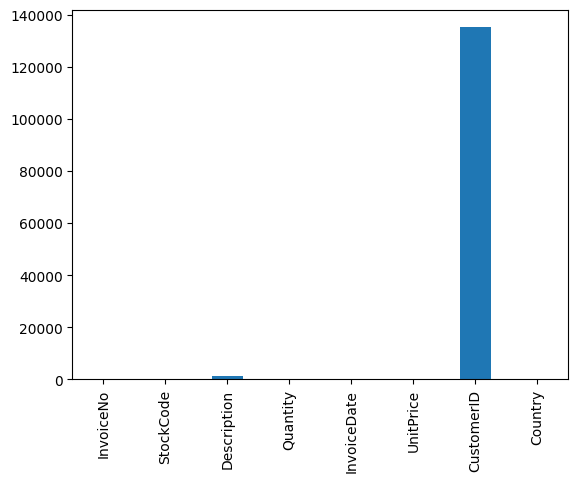

In [12]:
#visualizing the empty entries with a bar graph
ondata.isnull().sum().plot(kind='bar')

In [13]:
#removing misssing values from Description
ondata.dropna(subset=['Description'],inplace=True)
ondata.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133626
Country,0


<Axes: >

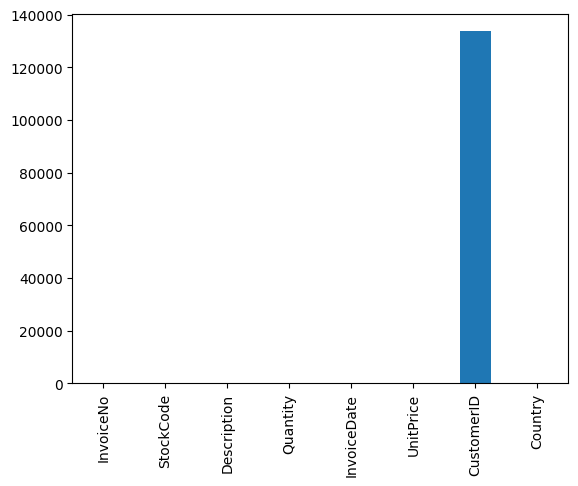

In [14]:
ondata.isna().sum().plot(kind='bar')

In [15]:
#dropping missing values customerid
ondata.dropna(subset=['CustomerID'],inplace=True)
ondata.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [16]:
#checking for duplicated data
ondata.duplicated().sum()

np.int64(5225)

In [17]:
#removing duplicated rows
ondata.drop_duplicates(inplace=True)

In [18]:
#checking for duplicate after removing them
ondata.duplicated().sum()

np.int64(0)

In [19]:
#finding the unique categorical viriables
ondata['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [20]:
ondata['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [21]:
#checking for cancelled transaction and assign a variable to it
cantnx=ondata[ondata['InvoiceNo'].str.contains('C',na=False)]
cantnx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
#.describe on cancelled transaction
cantnx.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8872.000000,8872,8872.000000,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512,14990.152953
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2011-03-23 11:23:45,1.450000,13505.000000
50%,-2.000000,2011-07-11 13:51:00,2.950000,14868.000000
75%,-1.000000,2011-10-06 20:36:00,4.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1172.249902,NaN,445.190864,1708.230387


according to our analysis, the count gives us the summation of all cancelled transactions in the entire dataset, the total number of cancelled transaction is 8827 whcih account to approximately 2% of our dataset. the mean gives us the average  of the number of times a transaction was cancelled. whereas the min is the minimum numbers in our cancelled transaction.Moreover the percentiles gives us the various percentile ranges of the cancelled transactions.Max shows the maximum number of time a transaction was cancelled.the std indicates how cancelled transactions are far or closer to the mean.        

In [23]:
len(ondata)


401604

In [24]:
#percentage of the cancelled transaction
(len(cantnx)/len(ondata))*100
#8872/401604*100

2.209141343213713

In [25]:
#find the unique values in the stock code column
scode=ondata['StockCode'].value_counts().index.unique()
#scode.unique() by
scode


Index(['85123A',    22423, '85099B',    47566,    84879,    20725,    22720,
         'POST',    22197,    23203,
       ...
       '90128B',    47016, '90152B',    20957, '90125E', '90181A', '90199B',
          90102,    84550, '90214O'],
      dtype='object', name='StockCode', length=3684)

In [26]:
#listing all the unique scode
scode=ondata['StockCode'].unique()
len(scode)

3684

In [27]:
#Finding the stock code with the highest quantity
scode= ondata['StockCode'].value_counts()
scode.idxmax()


'85123A'

In [28]:
#selecting scode of our dataset
scode=ondata[ondata['StockCode']=='85123A']
scode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
538708,581412,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,2011-12-08 14:38:00,2.95,14415.0,United Kingdom
539083,581432,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2011-12-08 15:51:00,2.55,13798.0,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796.0,United Kingdom


according to the table above we realise that the product with the hieghest stockcode whcih has it coresponding product to be WHITE HANGING HEART T-LIGHT HOLDER has the highest purchases amoung all the purchases made.Hence in order to improve business revenue we should have more WHITE HANGING HEART T-LIGHT HOLDER	product in stocks and make sure we dont run out stocks

In [29]:
#finding the top 10 product
top_10=ondata['StockCode'].value_counts(normalize=True).head(10)*100
top_10


,proportion
StockCode,
85123A,0.514188
22423,0.471609
85099B,0.413093
47566,0.350843
84879,0.349847
20725,0.335156
22720,0.304778
POST,0.297806
22197,0.276392


In [30]:
#top 10 product with the highest frequency
top_10=ondata['StockCode'].value_counts()
top_10

,count
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
...,...
90181A,1
90199B,1
90102,1


In [31]:
#finding the products with the highest frequency against it description
top_10=ondata['Description'].value_counts().head(10)
top_10



,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1099


In [32]:
#SELECTING POST
post=ondata[ondata['StockCode']=='POST'].value_counts().head(10)
post

,,,,,,,,count
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,
C580957,POST,POSTAGE,-1,2011-12-06 14:23:00,4.5,12839.0,United Kingdom,1
536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France,1
536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands,1
536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany,1
536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany,1
536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France,1
536858,POST,POSTAGE,2,2010-12-03 10:36:00,40.0,13520.0,Switzerland,1
536861,POST,POSTAGE,3,2010-12-03 10:44:00,18.0,12427.0,Germany,1
536967,POST,POSTAGE,1,2010-12-03 12:57:00,18.0,12600.0,Germany,1


In [33]:
#selecting the product description of post
post=ondata[ondata['StockCode']=='POST']
post

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany


<function matplotlib.pyplot.show(close=None, block=None)>

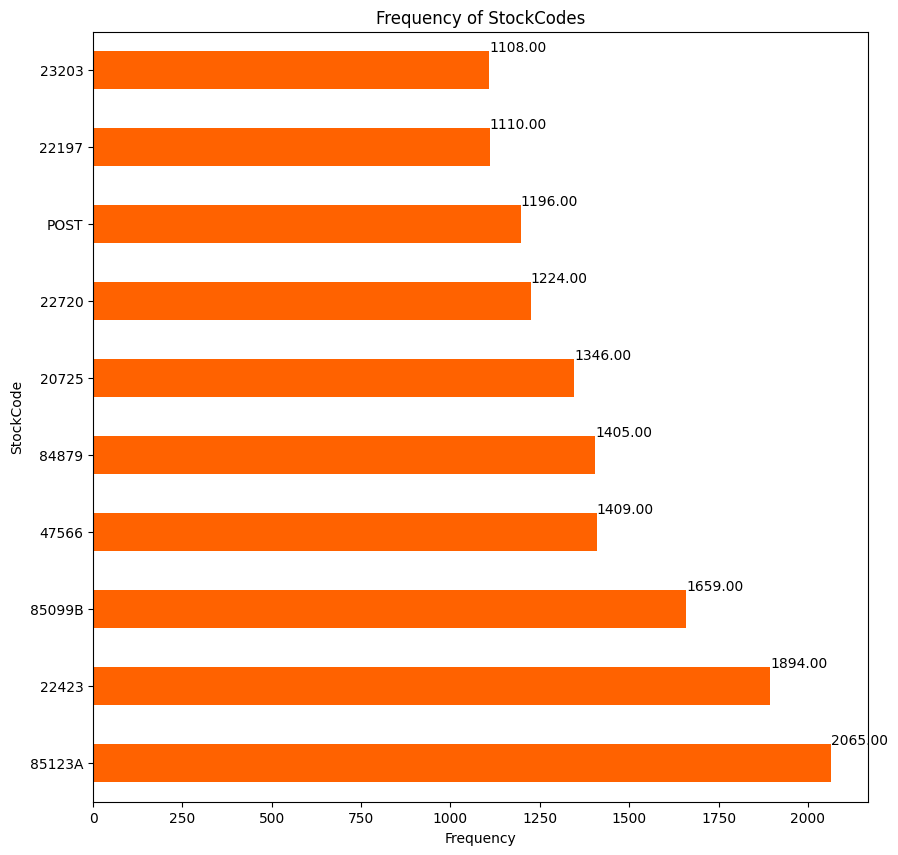

In [34]:
#visualizing top_10

import plotly.graph_objects as go
from tabulate import tabulate
top_10=ondata['StockCode'].value_counts().head(10)



plt.figure(figsize=(10, 10))
top_10.plot(kind='barh', color= '#ff6200')

for index, value in enumerate(top_10):
  plt.text(value, index+0.25, f'{value:.2f}', fontsize=10)#come back

plt.title('Frequency of StockCodes')
plt.xlabel('Frequency')
plt.ylabel('StockCode')
#plt.gca().invert_yaxis()
plt.show

come back.

<function matplotlib.pyplot.show(close=None, block=None)>

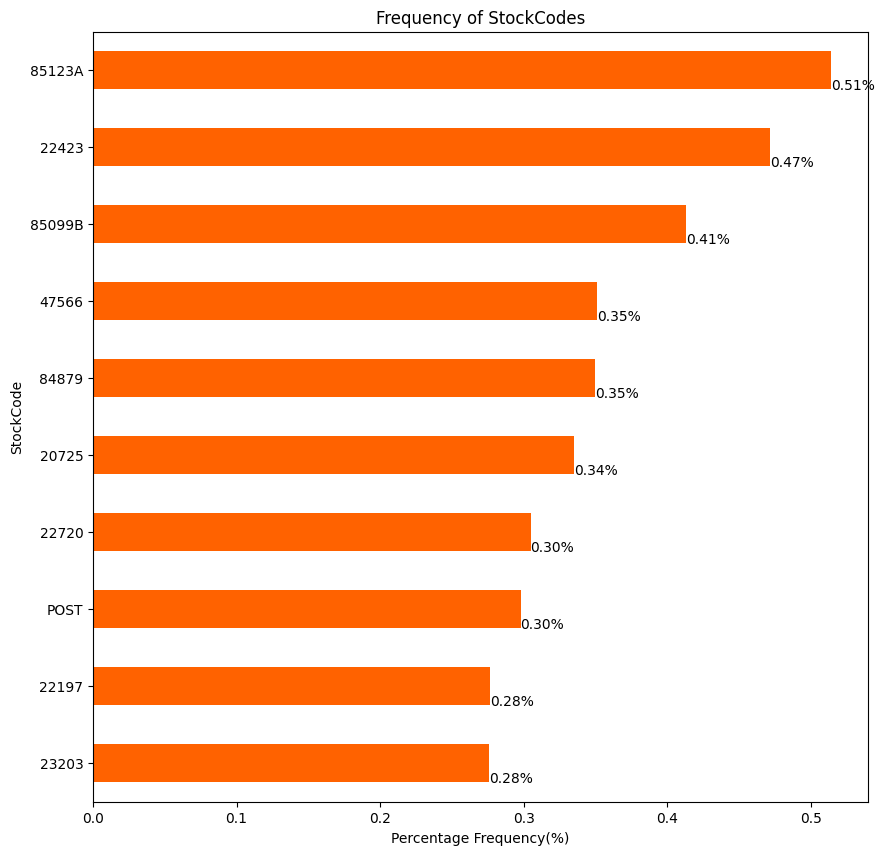

In [35]:
import plotly.graph_objects as go
from tabulate import tabulate

top_10  = ondata['StockCode'].value_counts(normalize=True).head(10) *100
top_10


plt.figure(figsize=(10, 10))
top_10.plot(kind='barh', color= '#ff6200')

for index, value in enumerate(top_10):
  plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Frequency of StockCodes')
plt.xlabel('Percentage Frequency(%)')
plt.ylabel('StockCode')
plt.gca().invert_yaxis()
plt.show

In [36]:
#finding the country with the most entries
ondata['Country'].value_counts()

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [37]:
#go into Singapore and look at the stock codes finding the product which are bought. find which product are unspecified
#extract date from the date column


In [38]:
#outputting all Singapore transactions
Singapore=ondata[ondata['Country']=='Singapore']
Singapore


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
70758,542102,21519,GIN & TONIC DIET GREETING CARD,72,2011-01-25 13:26:00,0.36,12744.0,Singapore
70759,542102,22697,GREEN REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore
70760,542102,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore
70761,542102,22343,PARTY PIZZA DISH RED RETROSPOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore
70762,542102,22344,PARTY PIZZA DISH PINK POLKADOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore
...,...,...,...,...,...,...,...,...
398370,571239,21888,BINGO SET,12,2011-10-14 14:54:00,3.75,12744.0,Singapore
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744.0,Singapore
406405,C571750,M,Manual,-1,2011-10-19 11:16:00,2118.74,12744.0,Singapore
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore


In [39]:
#outputting product bought
Singapore[['StockCode','Description'] ]

,StockCode,Description
70758,21519,GIN & TONIC DIET GREETING CARD
70759,22697,GREEN REGENCY TEACUP AND SAUCER
70760,22699,ROSES REGENCY TEACUP AND SAUCER
70761,22343,PARTY PIZZA DISH RED RETROSPOT
70762,22344,PARTY PIZZA DISH PINK POLKADOT
...,...,...
398370,21888,BINGO SET
406404,M,Manual
406405,M,Manual
406406,M,Manual


In [40]:
#finding the product with the highest frequency
Singapore.mode()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,560360,M,Manual,12,2011-07-18 11:55:00,1.25,12744.0,Singapore


In [41]:
#finding the product with the highest frequency
Singapore[['StockCode','Description']].value_counts()

,,count
StockCode,Description,
M,Manual,14
22343,PARTY PIZZA DISH RED RETROSPOT,4
20685,DOORMAT RED RETROSPOT,3
85150,LADIES & GENTLEMEN METAL SIGN,3
48138,DOORMAT UNION FLAG,3
...,...,...
81950B,FLOWER BLUE CLOCK WITH SUCKER,1
47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,1
84997C,CHILDRENS CUTLERY POLKADOT BLUE,1


In [42]:
#finding unspecified product
unsp=ondata[ondata['Country']=='Unspecified']
unsp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265.0,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265.0,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265.0,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265.0,Unspecified


In [43]:
#finding unspecified product
unsp[['StockCode','Description','Country']].value_counts()

,,,count
StockCode,Description,Country,
23108,SET OF 10 LED DOLLY LIGHTS,Unspecified,3
84879,ASSORTED COLOUR BIRD ORNAMENT,Unspecified,3
22585,PACK OF 6 BIRDY GIFT TAGS,Unspecified,2
21065,BOOM BOX SPEAKER GIRLS,Unspecified,2
20679,EDWARDIAN PARASOL RED,Unspecified,2
...,...,...,...
85049A,TRADITIONAL CHRISTMAS RIBBONS,Unspecified,1
85179A,GREEN BITTY LIGHT CHAIN,Unspecified,1
85179C,PINK BITTY LIGHT CHAIN,Unspecified,1


In [44]:
#extracting date from the date cloumn
date=pd.to_datetime(ondata['InvoiceDate']).dt.month #pd.to_datetime(df['date']).dt.month
date
ondata['invoice month']=date
ondata.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12


In [45]:
#extracting Day from the date cloumn
day=pd.to_datetime(ondata['InvoiceDate']).dt.day_name() #pd.to_datetime(df['date']).dt.month
day
ondata['invoice Day']=day
ondata.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,Friday


In [46]:
#
ondata['Description'].loc[:1000]

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
996,SKULLS SQUARE TISSUE BOX
997,PINK PAISLEY SQUARE TISSUE BOX
998,PACK OF 6 HANDBAG GIFT BOXES
999,TOAST ITS - HAPPY BIRTHDAY


In [47]:
low_case=ondata['Description'].unique()
low_case

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [48]:
len(low_case)

3896

In [49]:
low_case=[desc for desc in low_case if any (char.islower() for char in desc)]
low_case


['Discount',
 'BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'Manual',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'Bank Charges',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'CRUK Commission',
 'High Resolution Image']

In [50]:
#dropping bank charges
ondata.drop(ondata[ondata['Description']=='Bank Charges'].index,inplace=True)
ondata.drop(ondata[ondata['Description']=='High Resolution Image'].index,inplace=True)
ondata.drop(ondata[ondata['Description']=='Next Day Carriage'].index,inplace=True)

In [51]:
low_case

['Discount',
 'BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'Manual',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'Bank Charges',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'CRUK Commission',
 'High Resolution Image']

In [52]:
ondata.tail(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom,12,Friday
541860,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,12,Friday
541861,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,12,Friday
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,2011-12-09 12:20:00,1.65,17581.0,United Kingdom,12,Friday
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581.0,United Kingdom,12,Friday
541864,581582,23498,CLASSIC BICYCLE CLIPS,12,2011-12-09 12:21:00,1.45,17581.0,United Kingdom,12,Friday
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,12,Friday
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom,12,Friday
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,12,Friday
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777.0,United Kingdom,12,Friday


In [53]:
scode=ondata[ondata['StockCode']=='BANK CHARGES']
scode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day


In [54]:
#outputting unite price with entries equal to zero
zero_out=ondata[ondata['UnitPrice']==0]
zero_out

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,12,Sunday
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,12,Thursday
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,12,Tuesday
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,1,Thursday
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,1,Thursday
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,1,Thursday
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,2,Thursday
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,3,Wednesday
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,3,Wednesday
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,4,Monday


In [55]:
scode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day


In [56]:
#outputting outliers
out_stock = [i for i in scode if sum(char.isdigit() for char in str(i)) in (0, 1)]
print('Outlier Stockcodes.')
for i in out_stock:
   print(i)

Outlier Stockcodes.
InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
invoice month
invoice Day


In [57]:
#finding the outliers with it product description
fdata=ondata[ondata['StockCode'].isin(('POST','M','D','CRUK','DOT','PADS'))]
mdata=fdata[['Description','StockCode']]
mdata.tail(10)

,Description,StockCode
536968,POSTAGE,POST
537459,POSTAGE,POST
537462,POSTAGE,POST
538321,Manual,M
541198,POSTAGE,POST
541216,POSTAGE,POST
541541,Manual,M
541730,POSTAGE,POST
541767,POSTAGE,POST
541768,POSTAGE,POST


According the output of the outliers and thier description we get to know that the outliers are not product but are some services being carried out by the shop  

In [58]:
#dropping anomalies in the dataset
ondata.drop(ondata[ondata['StockCode']=='BANK CHARGES'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='DOT'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='PADS'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='M'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='CRUK'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='D'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='POST'].index,inplace=True)
ondata.drop(ondata[ondata['UnitPrice']==0].index,inplace=True)
ondata.drop(ondata[ondata['Country']=='Unspecified'].index,inplace=True)

In [59]:
ondata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday


In [60]:
#creating a new dataset
newdata=ondata.copy()
newdata


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday


In [61]:
#creating a new colum
newdata['TransactionStatus']=''
newdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday,
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday,
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,


In [62]:
#inputting our transaction status
newdata['TransactionStatus'] = ['cancelled' if val == 'c' else 'completed' for val in newdata['InvoiceNo']]
newdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,completed
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday,completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday,completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,completed


In [63]:
# visualizing 30 sample data
viz_30=ondata.head(30)
mainv=viz_30[['Description','Quantity']]
mainv

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,WHITE METAL LANTERN,6
2,CREAM CUPID HEARTS COAT HANGER,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,RED WOOLLY HOTTIE WHITE HEART.,6
5,SET 7 BABUSHKA NESTING BOXES,2
6,GLASS STAR FROSTED T-LIGHT HOLDER,6
7,HAND WARMER UNION JACK,6
8,HAND WARMER RED POLKA DOT,6
9,ASSORTED COLOUR BIRD ORNAMENT,32


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

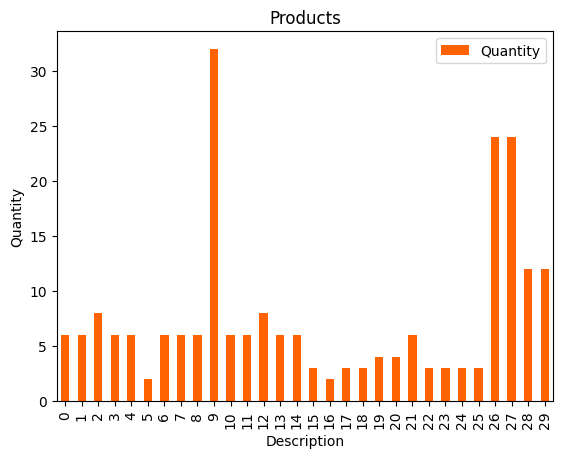

In [64]:
#visualing 30 product and their quantity
import plotly.graph_objects as go
from tabulate import tabulate

mainv=viz_30[['Description','Quantity']]


plt.figure(figsize=(10, 10))
mainv.plot(kind='bar', color= '#ff6200')



plt.title('Products')
plt.xlabel('Description')
plt.ylabel('Quantity')
#plt.gca().invert_yaxis()
plt.show

In [65]:
Singapore[['Description','InvoiceDate','Quantity']].head(3)

,Description,InvoiceDate,Quantity
70758,GIN & TONIC DIET GREETING CARD,2011-01-25 13:26:00,72
70759,GREEN REGENCY TEACUP AND SAUCER,2011-01-25 13:26:00,6
70760,ROSES REGENCY TEACUP AND SAUCER,2011-01-25 13:26:00,6


In [66]:
Singapore[['Description','InvoiceDate','Quantity']].tail(3)

,Description,InvoiceDate,Quantity
406405,Manual,2011-10-19 11:16:00,-1
406406,Manual,2011-10-19 11:18:00,1
406407,Manual,2011-10-19 11:18:00,1


In [67]:
Singapore=ondata[ondata.Country=='Singapore']
Singapore

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
70758,542102,21519,GIN & TONIC DIET GREETING CARD,72,2011-01-25 13:26:00,0.36,12744.0,Singapore,1,Tuesday
70759,542102,22697,GREEN REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore,1,Tuesday
70760,542102,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore,1,Tuesday
70761,542102,22343,PARTY PIZZA DISH RED RETROSPOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,1,Tuesday
70762,542102,22344,PARTY PIZZA DISH PINK POLKADOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...
398366,571239,21947,SET OF 6 HEART CHOPSTICKS,12,2011-10-14 14:54:00,1.25,12744.0,Singapore,10,Friday
398367,571239,21948,SET OF 6 CAKE CHOPSTICKS,12,2011-10-14 14:54:00,1.25,12744.0,Singapore,10,Friday
398368,571239,21949,SET OF 6 STRAWBERRY CHOPSTICKS,12,2011-10-14 14:54:00,1.25,12744.0,Singapore,10,Friday
398369,571239,23229,VINTAGE DONKEY TAIL GAME,6,2011-10-14 14:54:00,3.75,12744.0,Singapore,10,Friday


In [68]:
# Ensure InvoiceDate is in datetime format
Singapore['InvoiceDate'] = pd.to_datetime(Singapore['InvoiceDate'])

In [69]:
# Extract just the date (without time)
Singapore['Date'] = Singapore['InvoiceDate'].dt.date

In [70]:
# Top 10 most purchased products
top_products = Singapore['Description'].value_counts().head(10)
print("Top 10 Most Purchased Products in Singapore:")
print(top_products)

Top 10 Most Purchased Products in Singapore:
Description
PARTY PIZZA DISH RED RETROSPOT      4
DOORMAT RED RETROSPOT               3
PLEASE ONE PERSON METAL SIGN        3
LADIES & GENTLEMEN METAL SIGN       3
DOORMAT UNION FLAG                  3
POLKA DOT RAFFIA FOOD COVER         2
STRAWBERRY RAFFIA FOOD COVER        2
PARTY PIZZA DISH GREEN POLKADOT     2
TEA BAG PLATE RED RETROSPOT         2
RED RETROSPOT CHILDRENS UMBRELLA    2
Name: count, dtype: int64


In [71]:
# Number of purchases by date
purchase_by_date = Singapore['Date'].value_counts().sort_index()
print("\nNumber of Purchases by Date in Singapore:")
print(purchase_by_date.head())


Number of Purchases by Date in Singapore:
Date
2011-01-25    56
2011-04-05    52
2011-07-18    75
2011-10-14    32
Name: count, dtype: int64


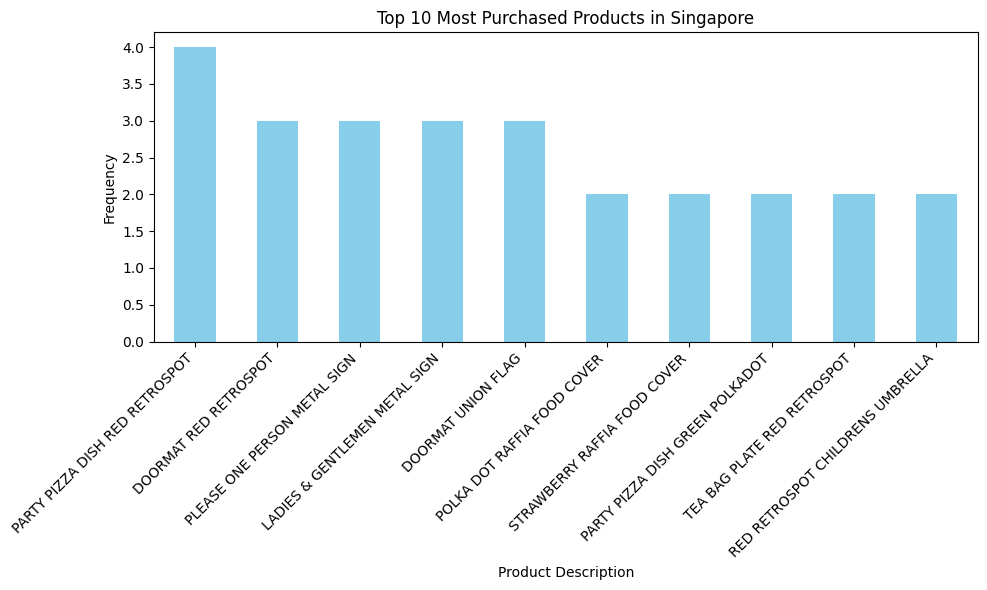

In [72]:
# Visualize the top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Purchased Products in Singapore")
plt.xlabel("Product Description")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Transactions')

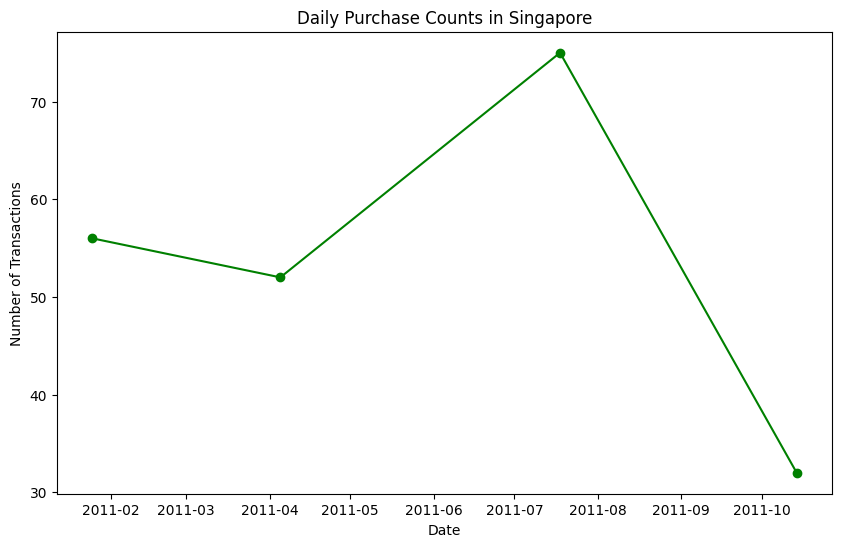

In [73]:
# Visualize purchases over time
plt.figure(figsize=(10, 6))
purchase_by_date.plot(kind='line', marker='o', color='green')
plt.title("Daily Purchase Counts in Singapore")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")